In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("Dhaka Rent.csv", sep=';')
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [8]:
df.shape

(60, 2)

In [9]:
df.corr()

,area,rent
area,1.000000,0.974807
rent,0.974807,1.000000


Text(0.5, 1.0, 'Dhaka City House Rent')

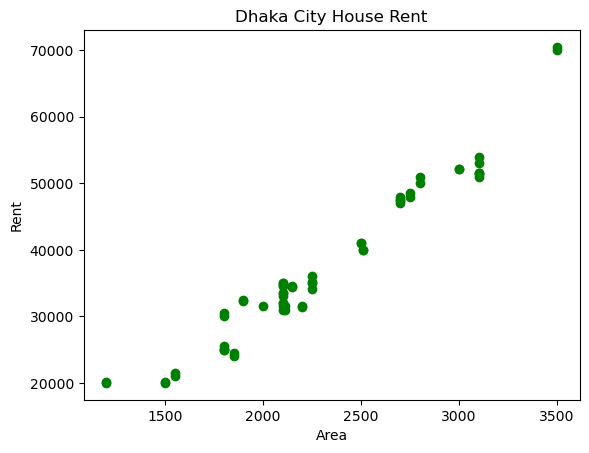

In [12]:
plt.scatter(df['area'], df['rent'], color='green', marker="o")
plt.xlabel("Area")
plt.ylabel("Rent")
plt.title("Dhaka City House Rent")

In [14]:
df.describe()

,area,rent
count,60.000000,60.000000
mean,2289.000000,37269.166667
std,538.880509,11770.736234
min,1200.000000,20000.000000
25%,1900.000000,31000.000000
50%,2130.000000,34450.000000
75%,2700.000000,47625.000000
max,3500.000000,70500.000000


1. Slope, m = Σ((x - x̄) * (y - ȳ)) / Σ((x - x̄)^2)2. 
Intercept, c = ȳ - m * x
3. Raw calculation
   ̄

In [15]:
x = df['area']
y = df['rent']

In [19]:
mean_x = np.mean(x)
mean_x

2289.0

In [20]:
mean_y = np.mean(y)
mean_y

37269.166666666664

In [23]:
dev_x = x - mean_x
dev_y = y - mean_y

In [24]:
coefficient_m = np.sum(dev_x * dev_y) / np.sum(dev_x ** 2)
coefficient_m

21.292661473611954

In [26]:
intercept = mean_y - (coefficient_m * mean_x)
intercept

-11469.7354464311

In [27]:
#prediction
coefficient_m * 2000 + intercept

31115.58750079281

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
reg = LinearRegression()
reg.fit(df[['area']], df['rent'])

LinearRegression()

In [31]:
reg.coef_

array([21.29266147])

In [32]:
reg.intercept_

-11469.735446431114

In [33]:
reg.predict([[2000]])

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([31115.58750079])

In [35]:
pred = reg.predict(df[['area']])
pred

array([31115.58750079, 33244.85364815, 41761.9182376 , 36438.7528692 ,
       52408.2489744 , 28986.32135343, 20469.25676399, 27921.68827975,
       46020.45053232, 33244.85364815, 34309.48672183, 33244.85364815,
       33244.85364815, 41974.84485233, 36438.7528692 , 54537.51512177,
       26857.05520607, 21533.88983767, 26857.05520607, 46020.45053232,
       33457.78026289, 33244.85364815, 63054.57971121, 14081.4583219 ,
       48149.71667968, 54537.51512177, 47085.083606  , 26857.05520607,
       35374.11979552, 54537.51512177, 33244.85364815, 33244.85364815,
       41761.9182376 , 36438.7528692 , 52408.2489744 , 28986.32135343,
       20469.25676399, 27921.68827975, 46020.45053232, 33244.85364815,
       34309.48672183, 33244.85364815, 33244.85364815, 41974.84485233,
       36438.7528692 , 54537.51512177, 26857.05520607, 21533.88983767,
       26857.05520607, 46020.45053232, 33457.78026289, 33244.85364815,
       63054.57971121, 14081.4583219 , 48149.71667968, 54537.51512177,
      

In [36]:
df['pred'] = pred
df.head()

,area,rent,pred
0,2000,31500,31115.587501
1,2100,35000,33244.853648
2,2500,41050,41761.918238
3,2250,36100,36438.752869
4,3000,52100,52408.248974


Text(0.5, 1.0, 'Dhaka City House Rent')

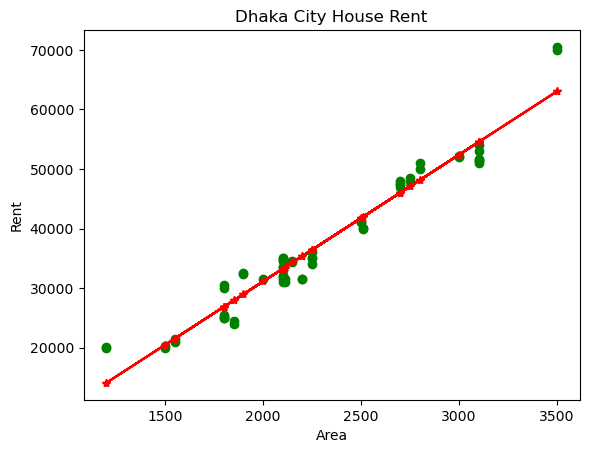

In [40]:
plt.plot(df['area'], df['pred'], marker="*", color="red")
plt.scatter(df['area'], df['rent'], color="green")
plt.xlabel("Area")
plt.ylabel("Rent")
plt.title("Dhaka City House Rent")

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [43]:
mse = mean_squared_error(df['rent'], df['pred']) # Actual y , Predicted y
mse

6778077.204095561

In [44]:
mae = mean_absolute_error(df['rent'], df['pred'])
mae

2009.8695093576282

In [45]:
import math
math.sqrt(mse)

2603.474064417689